# Tutorial 3: Clustering

**Autor:** Pablo Valenzuela

**Fecha:** 2022

**Objetivo:** El objetivo de este tutorial es relacionarse con `sklearn` para usar métodos de clustering y cómo visualizarlos.

**Nombre:** AGREGUE SU NOMBRE COMPLETO

# Herramientas

### Anaconda
La forma más fácil de tener un ambiente de Python **local** con todas las bibliotecas más comunes es instalar *Anaconda*. Para esto:

- Descarga en el siguiente link la última versión de Python: https://www.python.org/downloads/
- Descarga en el siguiente link la última versión de Anaconda para Python 3.7: https://www.anaconda.com/distribution/
- Puedes probar tu instalación ejecutando `python` en un terminal `Anaconda Prompt` y verificar que diga algo como `Python 3.7.6 |Anaconda 4.9.0` al principio. Opcionalmente, si quieres ejecutar las herramientas de anaconda desde la terminal del sistema, asegúrate de dejar en el PATH el directorio `bin` de anaconda (Guía en windows, *Add Anaconda to Path (Optional)* https://www.datacamp.com/community/tutorials/installing-anaconda-windows). 

**Instalación de Bibliotecas:**
Anaconda facilita mucho la instalación de las bibliotecas que usaremos en este laboratorio. Instalar las bibliotecas (`scikit-learn`, `jupyter`, `scipy`) desde cero puede ser un poco complicado. Por lo tanto, instalar Anaconda es altamente recomendado para estas sesiones de laboratorio.

1. Abrir aplicación Anaconda prompt.
2. Ejecutar comando: conda install *biblioteca*

Para este tutorial instalar las bibliotecas: *numpy*, *scikit-learn*, *matplotlib*, *scipy*

### Jupyter

**Jupyter notebook** viene con anaconda, es una aplicación Web que permite crear documentos con código Python, similar a los R Notebooks o R Markdown. Para el laboratorio 3.1 y el laboratorio 3.2 usaremos un **notebook** donde deberán completar sus respuestas en el mismo archivo.

Para cargar y editar un archivo.ipynb deben abrir la terminal del computador y ejecutar `jupyter notebook`. Esto abrirá el navegador donde pueden buscar el archivo .ipynb dentro del directorio. TIP: con Shift-Enter pueden ejecutar cada bloque del notebook.


El archivo en formato **HTML** se puede descargar ejecutando el siguiente comando desde la consola de anaconda: 

`jupyter nbconvert nombre_archivo.ipynb --to html`

Otra opción más sencilla es descargarlo desde el mismo notebook, haciendo clic en:
*File -> Download as-> HTML (.html)*

### Scikit-learn

Hay muchas bibliotecas para hacer análisis de datos. Para este tutorial vamos a usar **scikit-learn** (http://scikit-learn.org) que contiene muchos modelos de machine learning ya instalados. 

**OJO**: Si ya instalaste *Anaconda*, no necesitas instalar nada dado que viene en el pack.

## Google Colab

Aunque usaremos un notebook local (porque es importante que se familiaricen con anaconda), deben conocer <a href="https://colab.research.google.com/notebooks/welcome.ipynb?hl=es_US">Colaboratory</a>, también llamado "Colab", que esencialmente es un jupyter notebook con las siguientes ventajas:
- No requiere configuración
- Da acceso gratuito a GPUs
- Permite compartir contenido fácilmente

## Contexto

En el tutorial anterior vieron una introduccion a `scikit-learn`, `Pandas` y `Numpy` aplicado a clasificacion. Revise el tutorial anterior para ver cómo se usan estas 3 librerías y las APIs que existen (por ejemplo los modelos de `scikit-learn` casi siempre respetan `fit`, `predict`, `fit_predict`, `fit_transform`, etc).

En este tutorial usaremos `scikit-learn`, `numpy` y `scipy` para hacer entrenar nuestros modelos de clustering, junto con `matplotlib` para hacer visualizaciones de estos.

# Clustering

La técnica de clustering permite agrupar observaciones o datos que son similares entre sí. 
En este tutorial presentaremos 3 métodos de clustering para particionar datos: K-means, clustering jerárquico aglomerativo y DBSCAN (basado en densidad). 

Veremos cómo emplear cada uno de ellos y algunas formas de graficar los datos.

## K-Means

K-means es un método simple para particionar datos en distintos clusters, que intenta minimizar la distancia de cada punto de un cluster a su centroide. 
Para ejemplificar, y conocer cómo usarlo en `scikit-learn`, haremos un ejemplo práctico donde se ven claramente 3 clusters:


In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

random_state = 20

# Esto generara 500 datos con 2 features aleatorias cada uno, pero centrado alrededor de 3 centroides
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=3, random_state=random_state)

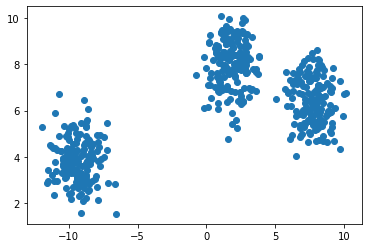

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Ejecutamos k-means y le indicamos que queremos que divida los datos en 3 clusters:

In [4]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(X) # fit retorna a self
y_pred = kmeans.predict(X)

# tambien podemos hacer todo al mismo tiempo si no tenemos intenciones de usar el modelo mas veces
# y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

Lo que estamos haciendo es crear un objeto KMeans, que está configurado para asignar 3 clusters, y le damos un `random_state` para tener resultados replicables. `n_init` significa que vamos a correr el método `n_init` veces, donde cada vez que se inicie el método se generan centroides que parten de manera aleatoria, finalmente se queda con el resultado que tiene el error más bajo. `max_iter` nos dice el número máximo de iteraciones que hará el modelo en el caso de que no encuentre convergencia antes.

Luego pasamos los datos al modelo para que corra el algorimo de clustering. Finalmente le pedimos que nos de los clusters asignados a cada valor de entrada.

`scikit-learn` también tiene métodos que nos permiten hacer varias pasos simultaneos, como lo es `fit_predict`, que como dice el nombre corre el algoritmo pero al mismo tiempo nos devolverá los clusters asignados.

Con el objeto `kmeans` entrenado podemos preguntar por algunos de los resultados. Podemos revisar cuáles son los centroides finales del modelo con `cluster_centers_`, cuáles son las asignaciones por cada uno de los ejemplos con `labels_` (en este caso es lo mismo que `y_pred` que tenemos arriba), el error de los clusters con `inertia_` y cuántas iteraciones tomó encontrar este resultado con `n_iter_`.

In [5]:
# aqui tenemos los centroides del modelo elegido
kmeans.cluster_centers_

array([[ 1.80025806,  7.99455026],
       [-9.3753175 ,  3.85672799],
       [ 7.74173571,  6.38572168]])

In [6]:
# las asignaciones, o labels
kmeans.labels_

array([1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1,
       0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2,
       0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2,
       2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0,

In [7]:
# el error del resultado actual
kmeans.inertia_

961.1785281390885

También podemos obtenes medias de, por ejemplo, cuántos datos quedaron en cada cluster. No hay nada automático para obtener ese resultado, pero podemos usar `numpy` para contar los clusters.

In [8]:
counts = np.bincount(y_pred)
print(counts)

# a veces tiene sentido filtrar los que tienen un valor mayor o igual a 0, ya que normalmente
# se asigna -1 cuando el dato es considerado ruido
# counts = np.bincount(y_pred[y_pred>=0])

[167 166 167]


En este caso, esto significa que tenemos 166 datos en el cluster 0, 167 en el cluster 1 y 167 en el cluster 2.

Por otro lado, las asignaciones por cluster se pueden incorporar a una nueva columna en el dataset (representando el *cluster*). **Sin embargo, hay que tener cuidado al agregar esta columna al dataframe original, pues (erróneamente) podrían usarla a futuro en las variables para estimar otro modelo de clustering.**

In [9]:
new_X = np.insert(X, 2, kmeans.labels_, axis=1)
new_X

array([[-11.05794875,   2.35758008,   1.        ],
       [  3.30025999,   6.92264204,   0.        ],
       [-11.60050708,   2.89695028,   1.        ],
       ...,
       [  7.64581332,   8.50909068,   2.        ],
       [  6.49003725,   6.0054937 ,   2.        ],
       [  1.53391876,   6.37801968,   0.        ]])

### Estimando la cantidad de clusters

En el ejemplo, creamos los datos nosotros, por lo que sabemos la cantidad de clusters que necesitamos. Sin embargo, esto no siempre es el caso, y como K-Means necesita este valor al momento de correr el algoritmo, no podemos dejarlo al azar.

Una forma de estimar el número de clusters es mediante la suma de la diferencia al cuadrado entre los puntos de cada cluster (SSE). En `scikit-learn` este dato se llama `inertia_`. Una tecnica para encontrar un número razonable de clusters a usar es el método del codo, donde calculamos el SSE para varios números de clusters y graficamos como varia el SSE, eligiendo el "mejor". Este concepto de "mejor" no es claro, pero la idea es elegir el último cluster antes de encontrarnos con el punto de _diminishing returns_, que sería cuando aumentar a más clusters nos da una mejora muy pequeña respecto a la que estamos considerando actualmente.

Veamos un ejemplo. Ejecutemos K-Means entre 1 y 15 clusters y grafiquemos cómo cambia el error a medida que aumentamos el número de clusters.


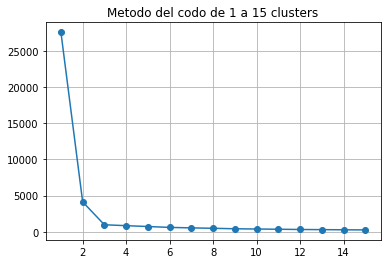

In [10]:
sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

El gráfico nos muestra el error de K-Means usando diferentes números de clusters. 
Acá se puede notar que un valor óptimo es 3 (mirar donde se forma el `codo` o el punto tras el cual el error decrece de manera menos significativa). 
Si eligiéramos 4 o más, veríamos más particiones, pero posiblemente estaríamos separando clusters ya existentes en clusters más pequeños.
Ojo que este método es una heurística y no siempre el `codo` es claramente visible.

¿De qué forma podría mejorar este método para tener una estimación más confiable?

### Visualización de clusters

Para ver los resultados del clustering de forma visual, podemos graficarlos y luego pintarlos de colores distintos dependiendo de a qué cluster corresponde cada punto.
En el siguiente código lo que hacemos es graficar los puntos igual que antes, pero agregamos el argumento `c`, que nos permite indicar de qué color pintar cada punto. Como tenemos `y_pred` o el atributo `labels_`, que corresponde al label o asignación para cada uno de los puntos, mediante esta podemos decirle a `matplotlib` que pinte cada punto con el color del cluster que se le fue asignado.

In [11]:
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X)

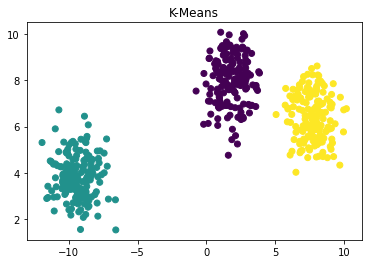

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

También podemos agregar los centroides a nuestro gráfico para ver dónde quedaron.

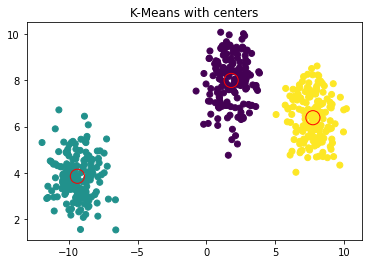

In [13]:
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(centers[:,0], centers[:,1], s=200, facecolors='none', edgecolors='r')
plt.title("K-Means with centers")
plt.show()

s

## Clustering Jerárquico Aglomerativo (Hierarchical clustering)

Otra forma de hacer clustering es mediante Clustering Jerárquico Aglomerativo. En este método lo que hacemos es partir con que cada dato es un cluster independiente de los demás, y luego, mediante una matriz de distancias vamos uniendo datos, creando anidaciones de clusters. Continuamos hasta que quede solo 1 cluster muy grande.

Generalmente estos métodos se grafican como un dendrograma, y usan la distancia euclidiana para calcular las matrices de distancias. Dicho esto, se pueden usar otras métricas de distancia para calcular la matriz de afinidad pero en la mayoría de los casos usamos la distancia euclidiana.

Vamos a presentar 4 criterios para ir uniendo los clusters. Estos corresponden a `complete`, `average`, `single` y `ward`. Aquí una descripción rápida de los criterios:
* `complete`: considera la distancia máxima entre 2 clusters
* `average`: considera la distancia promedio entre 2 clusters
* `single`: considera la distancia mínima entre 2 clusters
* `ward`: minimiza la varianza entre los 2 clusters

Para trabajar con clustering jerárquico podemos usar `scikit-learn` o `scipy`. `scikit-learn` lamentablemente no tiene una forma directa de graficar los dendrogramas, pero `scipy` sí, así que presentaremos ambas por si alguna vez las necesitan.

En `scipy` existe todo un módulo dedicado a clustering jerárquico [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). En particular aquí usaremos `linkage` para generar las uniones de cada dato y cluster, y `dendrogram` para graficar el árbol.

En `scikit-learn` tenemos [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) para computar los clusters y asignar los labels a cada dato.

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Aquí computamos los árboles usando cada uno de los criterios:

In [15]:
complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

Y ahora podemos graficar los árboles para ver como se distribuyen las ramas del árbol.

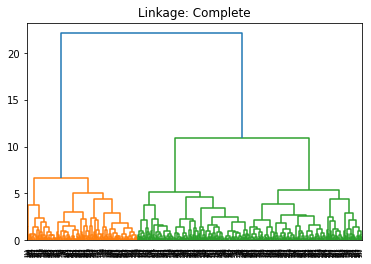

In [16]:
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

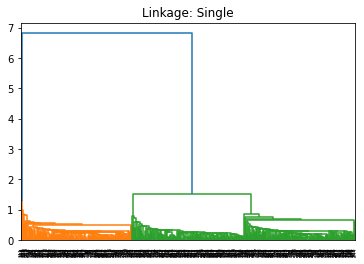

In [17]:
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

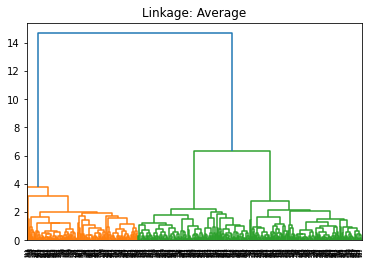

In [18]:
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

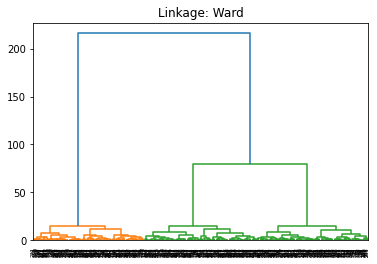

In [19]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

Viendo los arboles nos damos cuenta que las divisiones son bastante distintas entre cada método, pero en todas, visualmente, podemos llegar a un acuerdo de que 3 clusters es un número razonable.

Visualmente podemos cortar el arbol en distintos puntos para ver cómo se distribuyen los datos en las ramas. Luego manualente decidir viendo el dendrograma cuál sería una buena distancia para cortar el árbol.

Por ejemplo, en el caso de `ward`, 50 parece ser un buen número para cortar.

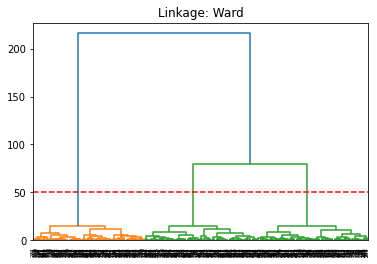

In [20]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.axhline(y=50, color='r', linestyle='--')
plt.show()

Hasta ahora hemos solo graficado los árboles, pero no hemos etiquetado los datos. Ahora podemos usar `scikit-learn` con `AgglomerativeClustering`. Aquí tenemos varias opciones.
* Si sabemos cuantos clusters queremos (viendo el dendrograma), agregamos el parametro `n_clusters` y lo dejamos en cuántos clusters queremos.
* Si sabemos a la distancia que queremos cortar (tambien viendo el dendrograma), entonces usamos el parametro `distance_threshold`.
* En el caso de que no usemos `linkage` podemos hacer correr el algoritmo y que genere todo el arbol (dejando `n_clusters=None` y `distance_threshold=0`), luego calcular la matriz de relaciones a mano, graficarla usando el dendrograma, decidir dónde cortar y volver a unos de los 2 puntos anteriores.

Corramos primero generando todo el árbol.

In [21]:
ward_all = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=0).fit(X)
print(ward_all.n_clusters_)

500


Como generamos el árbol entero tenemos tantos clusters como datos! Ahora, viendo el dendrograma anterior de `ward` decidimos que queremos 3 clusters. Entonces usamos lo siguiente:

In [22]:
ward_3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
print(ward_3.n_clusters_)

3


Y también podemos obtener la etiquetas.

In [23]:
ward_3.labels_

array([1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1,
       2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0,
       0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2,

Por supuesto, también podríamos haber decidido una distancia de donde cortar en vez de un número de clusters. En ese caso hacemos lo siguiente:

In [24]:
ward_dist = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=50).fit(X)
print(ward_dist.n_clusters_)
print(ward_dist.labels_)

3
[1 2 1 1 2 2 0 0 1 1 1 2 0 0 0 1 2 1 0 0 1 1 2 0 2 2 1 2 1 0 0 0 2 0 1 2 1
 0 2 2 0 2 0 0 0 0 1 1 1 0 0 0 2 2 2 1 0 2 0 0 1 0 0 2 0 1 1 0 1 0 0 2 0 0
 2 1 1 1 0 1 2 2 1 1 1 0 0 0 1 0 1 0 0 1 1 0 2 1 0 1 2 0 2 1 0 0 0 2 2 1 1
 1 1 1 1 2 2 1 2 0 2 0 0 1 1 0 2 0 2 0 1 0 2 1 2 2 0 1 0 2 2 0 0 2 2 2 0 1
 0 2 1 1 1 1 1 2 0 1 2 1 0 1 1 0 1 1 1 1 1 1 0 1 2 2 0 0 0 0 1 2 2 2 2 0 1
 0 2 0 2 0 2 2 1 2 2 2 0 0 2 2 1 0 0 2 1 0 0 2 0 2 1 1 2 2 1 0 2 2 1 0 1 0
 1 0 1 0 2 1 2 1 2 1 0 1 1 1 0 2 1 2 2 0 0 2 0 0 0 1 2 0 0 2 1 1 0 0 0 2 2
 1 0 2 0 0 0 1 1 0 2 1 2 2 0 2 1 2 1 1 2 2 2 0 2 1 0 0 0 1 0 1 0 1 2 2 1 0
 0 1 2 0 2 1 2 1 1 1 2 2 1 1 1 2 2 2 0 2 2 0 0 2 0 2 2 0 1 2 0 0 2 0 2 0 2
 2 1 1 1 0 2 2 1 1 0 1 1 2 0 2 1 2 1 0 2 2 1 2 1 2 2 1 2 0 2 2 1 1 1 0 1 0
 2 2 2 1 1 0 0 1 0 0 2 2 0 2 2 2 2 2 0 2 0 0 1 2 0 1 2 1 1 0 1 2 2 0 2 0 1
 2 0 0 1 1 1 2 0 1 1 2 2 0 2 0 2 0 0 0 0 1 1 1 2 2 1 1 2 2 1 0 2 0 2 2 2 2
 0 1 2 0 2 2 2 1 1 0 1 0 1 2 2 1 1 1 1 1 0 0 2 0 1 0 1 2 2 1 2 1 1 0 0 2 0
 0 1 0 1 0 0 1 1 1 1 2 

Podemos ver que en este caso los clusters asignados a cada dato son los mismos que cuando forzamos 3 clusters.

In [25]:
np.all(ward_3.labels_ == ward_dist.labels_)

True

Finalmente igual que en el caso de K-Means, podemos graficar nuestros clusters pintando cada dato del color asignado a cada cluster.

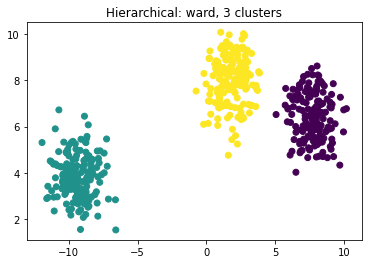

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=ward_3.labels_)
plt.title("Hierarchical: ward, 3 clusters")
plt.show()

## DBSCAN

Algoritmo de clustering basado en densidad. Este método permite identificar clusters cuyos datos contienen mucho ruido, outliers y presentan una forma poco clara de separar en un plano. Pero tiene la debilidad de no funcionar bien cuando los clusters tienen densidades variables o tenemos una dimensionalidad muy alta.

Probemos primero con el daset anterior que ya sabemos hay 3 clusters.

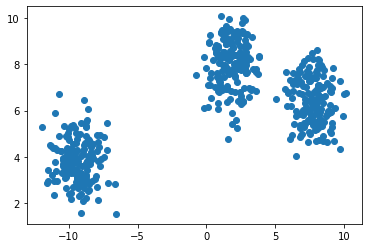

In [27]:
plt.scatter(X[:,0], X[:,1])

DBSCAN está implementado en `scikit-learn` y necesita de los parametros `eps` y `min_samples`. `eps` corresponde a la distancia dentro de la cual se consideran 2 puntos vecinos, `min_samples` corresponde al `minpts` visto en clases, que es el número de vecinos que tiene que tener un punto para ser considerado un punto _core_.

In [28]:
from sklearn.cluster import DBSCAN

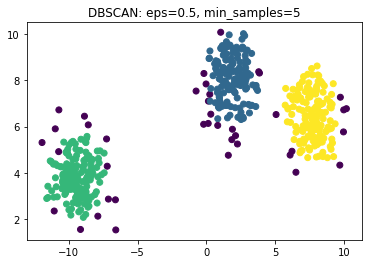

In [29]:
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

`eps` es el parametro más importante de DBSCAN, por lo que tenemos que elegirlo con cuidado. En este caso podemos ver que dice que hay 4 "clusters", de los cuales 3 son clusters reales y el resto es considerado como ruido.

Ahora probemos con un dataset un poco distinto, unos círculos concéntricos.

In [30]:
X2, y2 = datasets.make_circles(n_samples=1500, factor=.5,noise=.05)

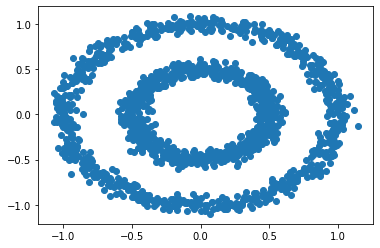

In [31]:
plt.scatter(X2[:,0], X2[:,1])

Nosotros humanos vemos claramente que hay 2 grupos de datos. Sin embargo, K-Means no es capaz de separar esos 2 clusters, y los métodos aglomerativos necesitan de ayudas como mátrices de conectividad para lograrlo. Veamos como DBSCAN sí puede.

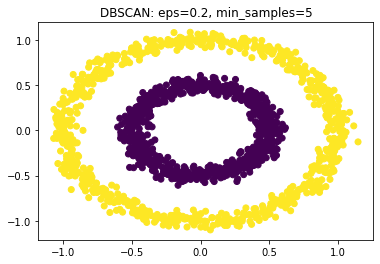

In [32]:
eps = 0.2
min_samples = 5

dbscan_circles = DBSCAN(eps=eps, min_samples=min_samples).fit(X2)
plt.scatter(X2[:,0], X2[:,1], c=dbscan_circles.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

Aquí podemos ver otros ejemplos con otros datasets con que las otras técnicas de clustering tienen problemas.

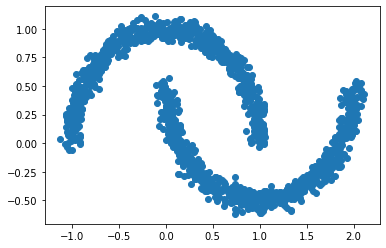

In [33]:
X3, y3 = datasets.make_moons(n_samples=1500, noise=.05)
plt.scatter(X3[:,0], X3[:,1])

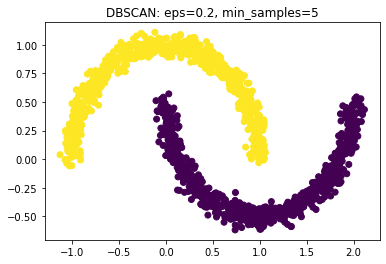

In [34]:
eps = 0.2
min_samples = 5

dbscan_moon = DBSCAN(eps=eps, min_samples=min_samples).fit(X3)
plt.scatter(X3[:,0], X3[:,1], c=dbscan_moon.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

## Evaluación de clusters

Evaluar la calidad de nuestros clusters es algo no trivial. En 2 dimensiones podemos claramente encontrar separaciones de clusters visualmente, asumiendo que es tan simple como mirar un gráfico. El tema es que rara vez tendremos solo 2 dimensiones en nuestros datos, y cuando ya tenemos más de 3 dimensiones, no podemos graficarlo de una forma directa y tenemos que depender de técnicas de reducción de dimensionalidad. Se verá más adelante en el curso, pero las salidas de estas técnicas no son realmente interpretables.

En esta sección veremos algunas forma de evaluar clusters, sea visual o numéricamente.

### Matriz de similitud (proximidad)

Uno de los métodos vistos en clases para evaluar la calidad de los clusters es haciendo una matriz de similitud. Estas matrices nos permiten ver qué tan cerca están los puntos pertenecientes a un cluster entre sí, y simultaneamente ver qué tan lejos están los puntos de un cluster de los otros clusters.

In [35]:
from sklearn.metrics.pairwise import euclidean_distances

In [36]:
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    dist = sim_matrix(data, model.labels_)
    im = ax2.imshow(dist, cmap="jet")
    fig.colorbar(im, ax=ax2)

Usemos también este nuevo dataset que tiene 4 clusters pero uno de ellos es bastante _sparse_ comparado con el resto.

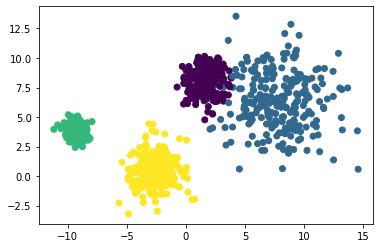

In [37]:
X4, y4 = datasets.make_blobs(n_samples=1000, centers=4, cluster_std=[1.0, 2.5, 0.5, 1.2], random_state=random_state)
plt.scatter(X4[:,0], X4[:,1], c=y4)

---

Usando los primeros datos que teniamos, obtenemos los siguientes resultados.

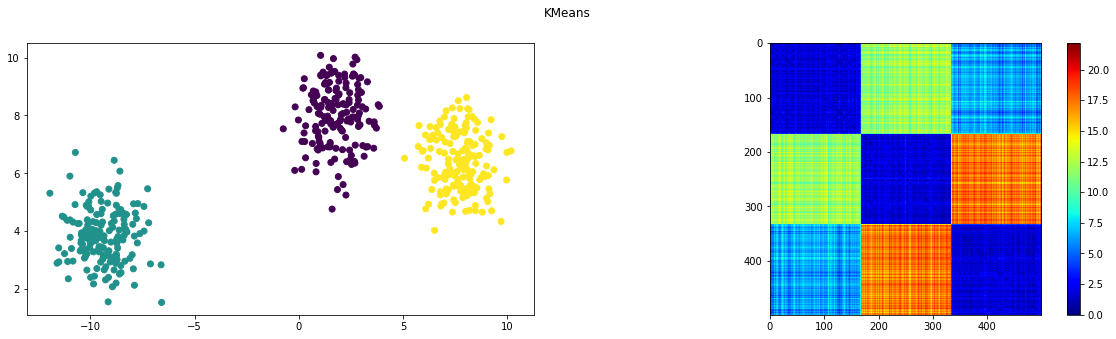

In [38]:
kmeans1 = KMeans(n_clusters=3, random_state=random_state).fit(X)
plot(X, kmeans1)
plt.show()

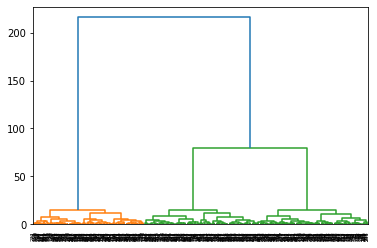

In [39]:
ward_link1 = linkage(X, method="ward")
dendrogram(ward_link1)
plt.show()

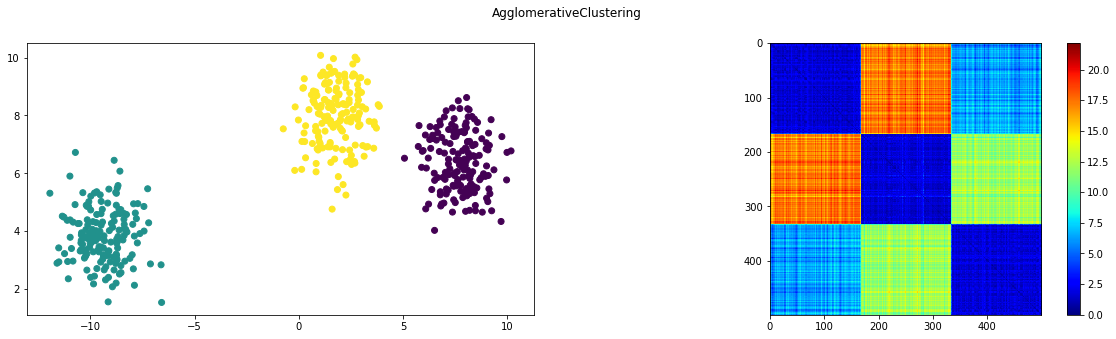

In [40]:
ward_clust1 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)

plot(X, ward_clust1)
plt.show()

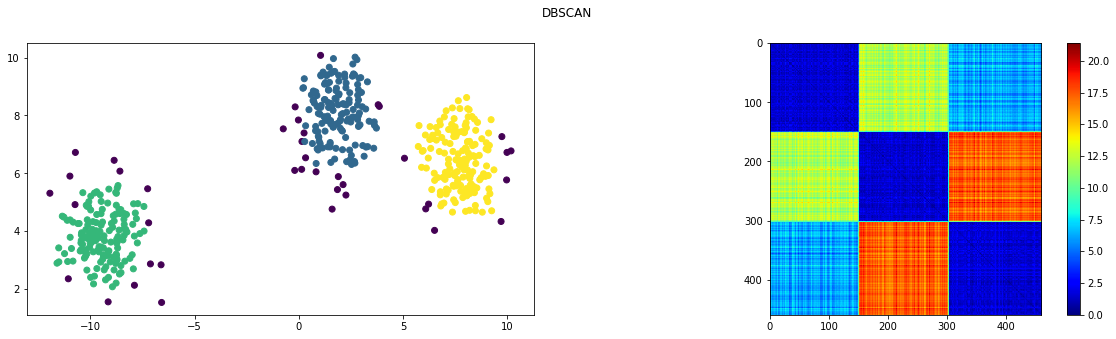

In [41]:
dbscan1 = DBSCAN(eps=0.5, min_samples=5).fit(X)

plot(X, dbscan1)
plt.show()

Vemos que a todos les va más o menos igual de bien.

---

Ahora con el dataset de círculos concéntricos.

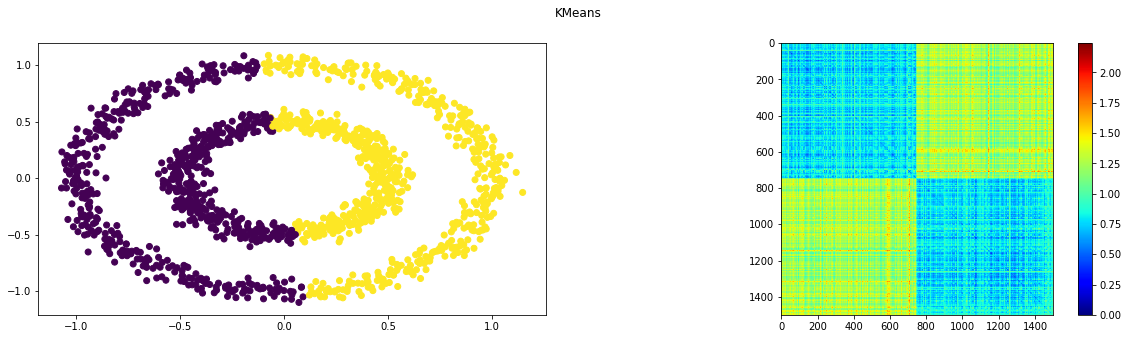

In [42]:
kmeans2 = KMeans(n_clusters=2, random_state=random_state).fit(X2)

plot(X2, kmeans2)
plt.show()

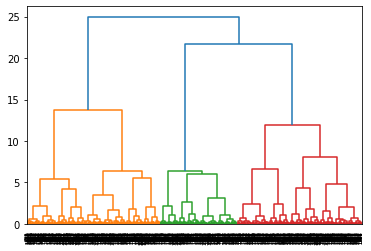

In [43]:
ward_link2 = linkage(X2, method="ward")
dendrogram(ward_link2)
plt.show()

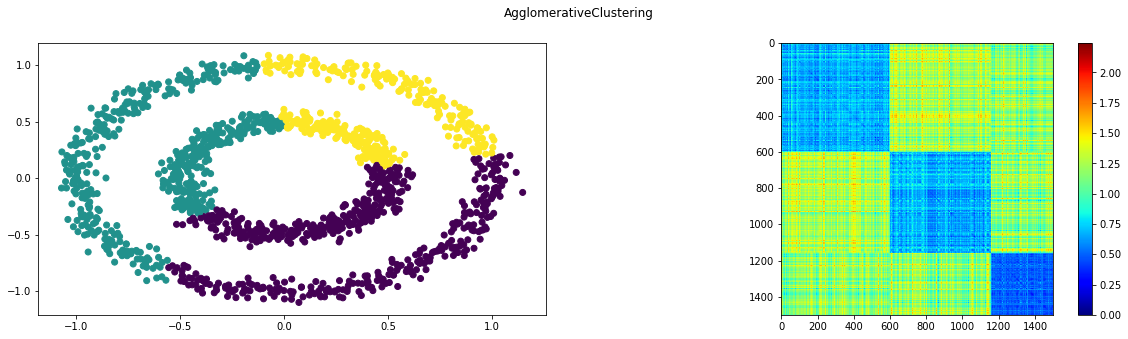

In [44]:
ward_clust2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X2)

plot(X2, ward_clust2)
plt.show()

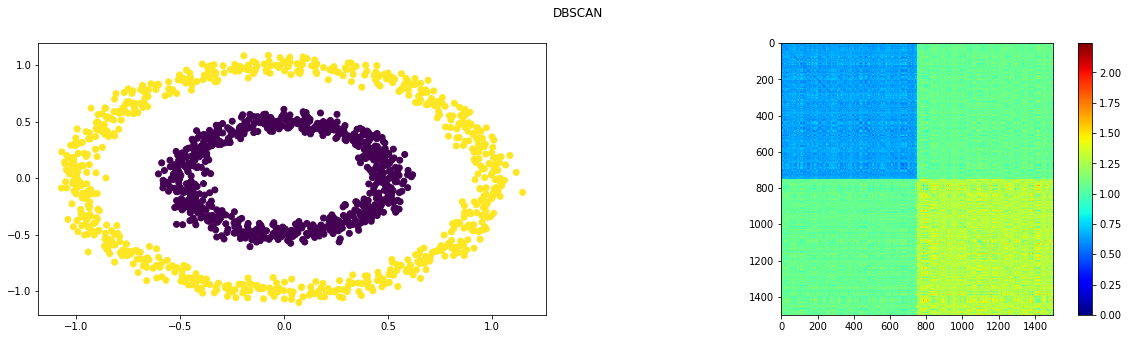

In [45]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5).fit(X2)

plot(X2, dbscan2)
plt.show()

En este caso vemos como K-Means y clustering aglomerativo fallan y DBSCAN captura exitosamente la division de clusters. Dicho esto, la matriz de similitud no logra capturar bien esta división, haciendo que se vea un cluster bueno y otro de menor calidad en DBSCAN.

---

Finalmente usando el dataset con distintas densidades.

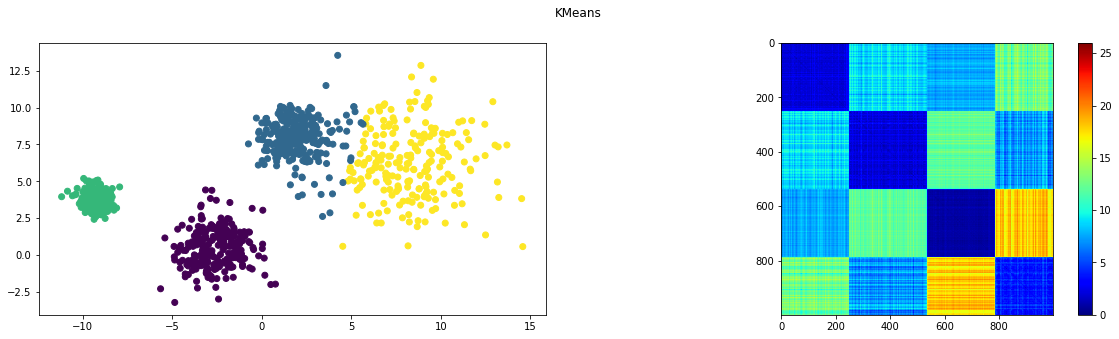

In [46]:
kmeans4 = KMeans(n_clusters=4, random_state=random_state).fit(X4)

plot(X4, kmeans4)
plt.show()

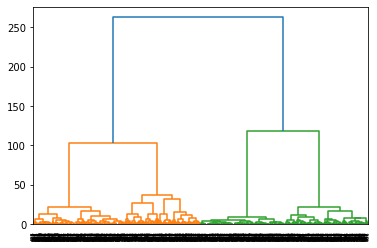

In [47]:
ward_link4 = linkage(X4, method="ward")
dendrogram(ward_link4)
plt.show()

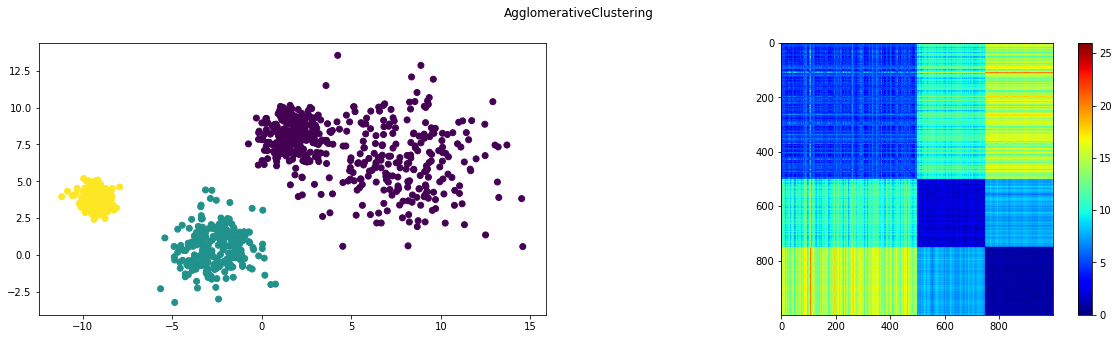

In [48]:
ward_clust4 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X4)

plot(X4, ward_clust4)
plt.show()

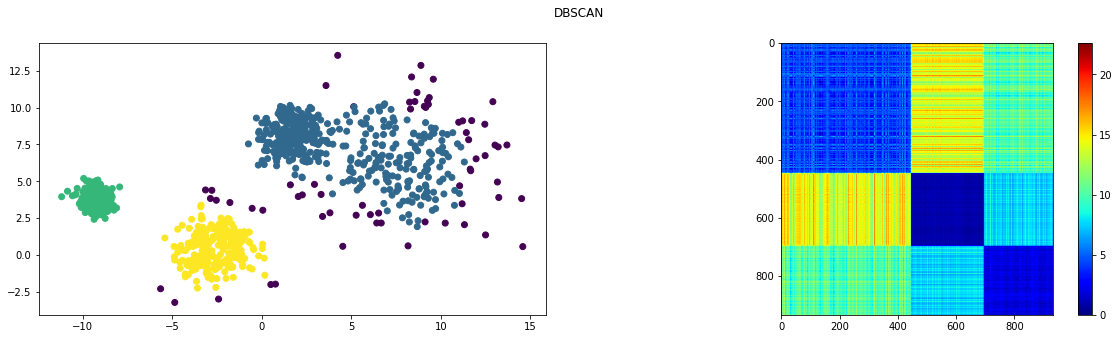

In [49]:
dbscan4 = DBSCAN(eps=1, min_samples=10).fit(X4)

plot(X4, dbscan4)
plt.show()

Solo K-Means capturó correctamente los 4 clusters. Ambos, clustering aglomerativo y DBSCAN consideran el clustering de baja densidad como una extensión de otro.

### Silhouette

Presentaremos otra forma de evaluar clusters, esta vez de una manera no visual usando el coeficiente de Silhouette. Como se vio en clases, este coeficiente calcula para cada punto:

1) su distancia promedio al resto de los puntos en su mismo clases, digamos `a`. En ingles esto se llama `mean intra-cluster distance`.

2) su distancia promedio a todos los puntos del cluster mas cercano, digamos `b`. En ingles esto se llama `mean nearest-cluster distance`.
Entonces el coeficiente de Silhouette se calcula con la siguiente formula:
$$\frac{b - a}{max(a, b)}$$

Esta métrica esta en un rango entre -1 y 1, donde 1 significa que algo está bien asignado, -1 significa que algo está mal asignado porque hay otro cluster más similar, y 0 significa que hay solapamiento de clusters.

In [50]:
from sklearn.metrics import silhouette_score

El coeficiente de Silhouette se calcula pasando el dataset y los labels asignados por el metodo de cluster:
```python
silhouette_score(<dataset>, <labels>)
```

Calculemos el Silhouette score de los modelos entrenados en la parte anterior.

In [51]:
print("Dataset X K-Means\t", silhouette_score(X, kmeans1.labels_))
print("Dataset X Ward Agg\t", silhouette_score(X, ward_clust1.labels_))
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
_filter_label = dbscan1.labels_ >= 0
print("Dataset X DBSCAN\t", silhouette_score(X[_filter_label], dbscan1.labels_[_filter_label]))

Dataset X K-Means	 0.7609159725439754
Dataset X Ward Agg	 0.7609159725439754
Dataset X DBSCAN	 0.7798244078959


In [52]:
print("Dataset X2 K-Means\t", silhouette_score(X2, kmeans2.labels_))
print("Dataset X2 Ward Agg\t", silhouette_score(X2, ward_clust2.labels_))
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
_filter_label = dbscan2.labels_ >= 0
print("Dataset X2 DBSCAN\t", silhouette_score(X2[_filter_label], dbscan2.labels_[_filter_label]))

Dataset X2 K-Means	 0.35382763705493947
Dataset X2 Ward Agg	 0.3537948692172438
Dataset X2 DBSCAN	 0.11483703017664904


In [53]:
print("Dataset X4 K-Means\t", silhouette_score(X4, kmeans4.labels_))
print("Dataset X4 Ward Agg\t", silhouette_score(X4, ward_clust4.labels_))
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
_filter_label = dbscan4.labels_ >= 0
print("Dataset X4 DBSCAN\t", silhouette_score(X4[_filter_label], dbscan4.labels_[_filter_label]))

Dataset X4 K-Means	 0.6816575119745327
Dataset X4 Ward Agg	 0.6581987572293247
Dataset X4 DBSCAN	 0.6948507108833173


### Otra forma de ver Silhouette

En la parte anterior usamos el coeficiente para todos los datos. También podemos considerar el coeficiente para cada dato individual y graficar eso. También podemos usar esta técnica como una alternativa para encontrar el número de clusters que queremos usar.

In [54]:
from sklearn.metrics import silhouette_samples

In [55]:
def plot_silhouette(dataset, model, ax1=None, ax2=None):
    use_indices = model.labels_ >= 0
    use_labels = model.labels_[use_indices]
    use_data = dataset[use_indices]

    n_clusters = len(np.unique(use_labels))

    if ax1 is None or ax2 is None:
        fig, (ax1, ax2) = plt.subplots(1, 2)

    silhouette_avg = silhouette_score(use_data, use_labels)
    print(f"The average silhouette_score for {model.__class__.__name__} is : {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(use_data, use_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[use_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"{model.__class__.__name__}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])

    ax2.scatter(use_data[:, 0], use_data[:, 1], c=use_labels)

def plot_multiple(dataset, models):
    n_models = len(models)
    
    fig, axs = plt.subplots(n_models, 2, figsize=(10, 5 * n_models))

    for i, (ax1, ax2) in enumerate(axs):
        plot_silhouette(dataset, models[i], ax1=ax1, ax2=ax2)

The average silhouette_score for KMeans is : 0.7609159725439754
The average silhouette_score for AgglomerativeClustering is : 0.7609159725439754
The average silhouette_score for DBSCAN is : 0.7798244078959


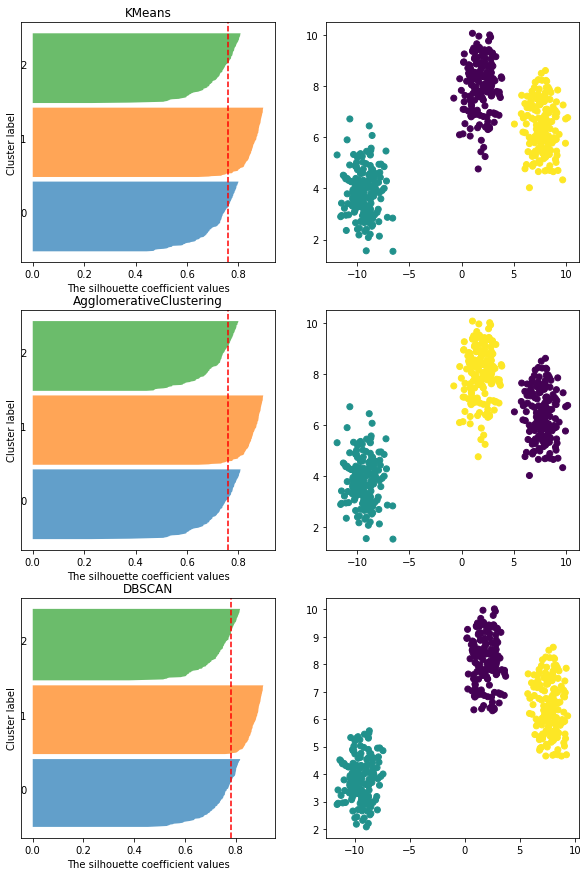

In [56]:
plot_multiple(X, [kmeans1, ward_clust1, dbscan1])

The average silhouette_score for KMeans is : 0.35382763705493947
The average silhouette_score for AgglomerativeClustering is : 0.3537948692172438
The average silhouette_score for DBSCAN is : 0.11483703017664904


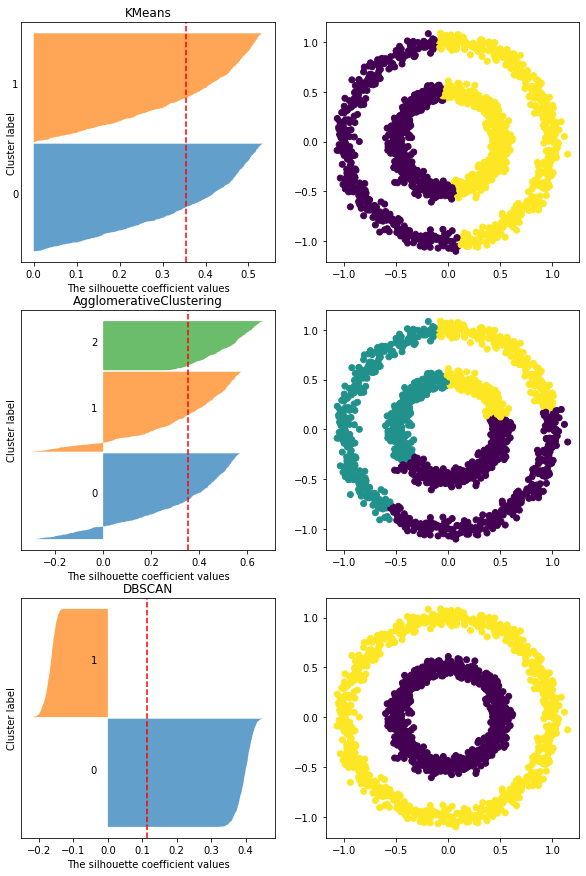

In [57]:
plot_multiple(X2, [kmeans2, ward_clust2, dbscan2])

The average silhouette_score for KMeans is : 0.6816575119745327
The average silhouette_score for AgglomerativeClustering is : 0.6581987572293247
The average silhouette_score for DBSCAN is : 0.6948507108833173


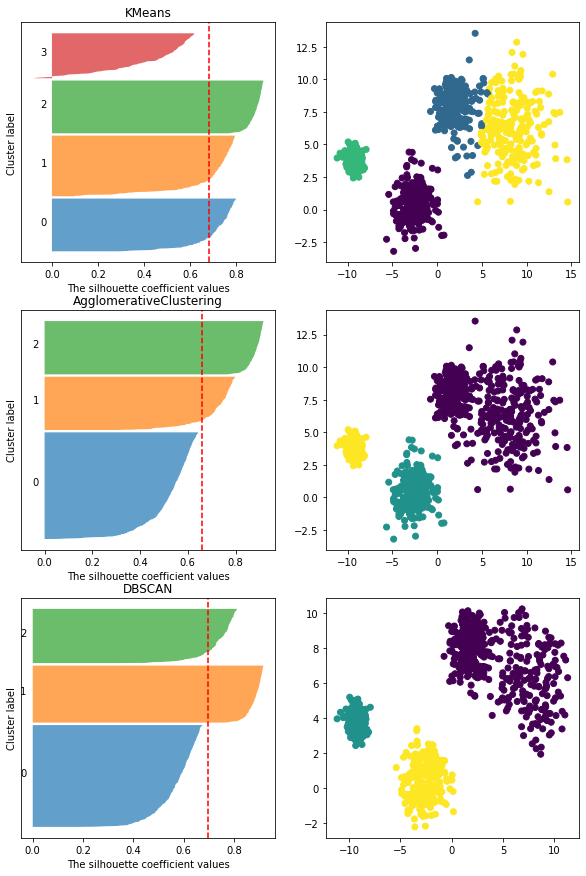

In [58]:
plot_multiple(X4, [kmeans4, ward_clust4, dbscan4])

### Información mutua

Si tenemos el label verdadero de cada cluster (casi nunca), podemos aplicar otras técnicas para evaluar los clusters que obtenemos. Una de esas otras técnicas es la Infomación Mutua, que básicamente ve la dependencia entre 2 distribuciones, nuestra distribucion real que conocemos (que casi nunca tenemos), y la que nos dio nuestro método de clustering. Para más detalles y la formulación mátematica vean el siguiente link: https://scikit-learn.org/stable/modules/clustering.html#id12

`sklearn` presenta 3 versiones de este concepto, Mutual Information (MI), Normalized Mutual Information (NMI), y Adjusted Mutual Information (AMI). La primera es un valor que mide la información mutua pero no está acotado entonces no sabemos que tan bueno o malo es teniendo solo el valor aislado. NMI y AMI están normalizados en el rango 0-1, así que es más fácil tener una idea de que significa el número. AMI tiene otra normalización respecto a la probabilidad de que salga cada label.

In [59]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score

In [60]:
print("Dataset X K-Means\t", normalized_mutual_info_score(y, kmeans1.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y, kmeans1.labels_, average_method='arithmetic'))
print("Dataset X Ward Agg\t", normalized_mutual_info_score(y, ward_clust1.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y, ward_clust1.labels_, average_method='arithmetic'))
_filter_label = dbscan1.labels_ >= 0
print("Dataset X DBSCAN\t", normalized_mutual_info_score(y[_filter_label], dbscan1.labels_[_filter_label], average_method='arithmetic'), adjusted_mutual_info_score(y[_filter_label], dbscan1.labels_[_filter_label], average_method='arithmetic'))
print("Dataset X DBSCAN, all\t", normalized_mutual_info_score(y, dbscan1.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y, dbscan1.labels_, average_method='arithmetic'))

Dataset X K-Means	 1.0 1.0
Dataset X Ward Agg	 1.0 1.0
Dataset X DBSCAN	 1.0 1.0
Dataset X DBSCAN, all	 0.848679701203368 0.8479078649846119


In [61]:
print("Dataset X2 K-Means\t", normalized_mutual_info_score(y2, kmeans2.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y2, kmeans2.labels_, average_method='arithmetic'))
print("Dataset X2 Ward Agg\t", normalized_mutual_info_score(y2, ward_clust2.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y2, ward_clust2.labels_, average_method='arithmetic'))
_filter_label = dbscan2.labels_ >= 0
print("Dataset X2 DBSCAN\t", normalized_mutual_info_score(y2[_filter_label], dbscan2.labels_[_filter_label], average_method='arithmetic'), adjusted_mutual_info_score(y2[_filter_label], dbscan2.labels_[_filter_label], average_method='arithmetic'))
print("Dataset X2 DBSCAN, all\t", normalized_mutual_info_score(y2, dbscan2.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y2, dbscan2.labels_, average_method='arithmetic'))

Dataset X2 K-Means	 5.1297869883715885e-06 -0.00047648435852757796
Dataset X2 Ward Agg	 0.0014839598911012197 0.0007279873177648543
Dataset X2 DBSCAN	 1.0 1.0
Dataset X2 DBSCAN, all	 1.0 1.0


In [62]:
print("Dataset X4 K-Means\t", normalized_mutual_info_score(y4, kmeans4.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y4, kmeans4.labels_, average_method='arithmetic'))
print("Dataset X4 Ward Agg\t", normalized_mutual_info_score(y4, ward_clust4.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y4, ward_clust4.labels_, average_method='arithmetic'))
_filter_label = dbscan4.labels_ >= 0
print("Dataset X4 DBSCAN\t", normalized_mutual_info_score(y4[_filter_label], dbscan4.labels_[_filter_label], average_method='arithmetic'), adjusted_mutual_info_score(y4[_filter_label], dbscan4.labels_[_filter_label], average_method='arithmetic'))
print("Dataset X4 DBSCAN, all\t", normalized_mutual_info_score(y4, dbscan4.labels_, average_method='arithmetic'), adjusted_mutual_info_score(y4, dbscan4.labels_, average_method='arithmetic'))

Dataset X4 K-Means	 0.9222620006750305 0.9220072472335469
Dataset X4 Ward Agg	 0.8571428571428571 0.8567873240141084
Dataset X4 DBSCAN	 0.8654618912546115 0.8651047424995355
Dataset X4 DBSCAN, all	 0.7987041763892029 0.7980037936899617
